<a href="https://colab.research.google.com/github/xcansuxakgul/AIR_Notebooks/blob/main/YOLONAS/YOLO_NAS_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# YOLO-NAS


---


YOLO ilk kez 2016'da yayımlandı ve çıktığı ilk günden itibaren görüntü işleme alanındaki çalışmalarda kullanılıyor.Nesne algılamada ve sınıflandırmada elde edilen high accuracy ve hız sebebiyle SOTA(state-of-the-art) performans sergiliyor. Ultralytics'in son yayımladığı YOLOv8'den sonra, Deci geçtiğimiz hafta yeni yolo modeli YOLO-NAS'ı(You Only Look Once: Neural Architecture Search) yayınladı. Deci'nin Neural Architecture Search teknolojisi AutoNAC™ tarafından oluşturuldu. AutoNAC™ motoru, herhangi bir görevi, veri özelliklerini, çıkarım ortamını ve performans hedeflerini girmenize izin verir ve ardından, belirli uygulamanız için doğruluk ve çıkarım hızı arasında en iyi dengeyi sağlayan en uygun mimariyi bulmanıza rehberlik eder.

YOLO ailesi ile kıyaslamasına bakalım:
![YolO modelleri kıyaslaması](https://github.com/Deci-AI/super-gradients/raw/master/documentation/source/images/yolo_nas_frontier.png)
---

YOLO-NAS'ın Yolov7 ve Yolov8 0.5 mAP daha yüksek ve 10-20% daha hızlı olduğu görülüyor.



> Detaylı bilgi için [yolo nas](https://github.com/Deci-AI/super-gradients/blob/master/YOLONAS.md) buraya bakabilirsiniz.




### Avantajları
detect small objects, improve localization accuracy, and increase the performance-per-compute ratio, making the model more accessible for real-time edge-device applications.


#### YOLO-NAS ile Object Detection Inference
### Object Detection
Object Detection(Nesne Algılama) en temel anlamda verilen bir resimdeki/videodaki objelerin tespitinde kullanılır.

![object detection](https://infotech.report/Images/Resources/f54e1b5b-de98-4e12-9f6f-4939194047e8_Resources_Real-time-Object.jpg)

In [ ]:
%%capture
!pip install -qU super-gradients imutils
!pip install pytube
!pip install torchview torchinfo

#restart runtime

* Supergradients Deci'nin Pytorch tabanlı, açık kaynaklı, görüntü işleme kütüphanesi. Modelleri kullanabilmek daha kolay.





#### Pre-trained Modeller

YOLO-NAS'ın artılarından bir tanesi de Roboflow100, Object365,Coco gibi datasetlerle halihazırda eğitildi. Biz yukarıdaki örnekte "yolo_nas_l" kullandık.

In [ ]:
from super_gradients.training import models

yolo_nas_l = models.get("yolo_nas_l", pretrained_weights="coco")

[2023-05-11 17:22:53] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.


### Model Architecture



In [ ]:
from torchinfo import summary

summary(model=yolo_nas_l,
        input_size=(16, 3, 640, 640),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                           Input Shape          Output Shape         Param #              Trainable
YoloNAS_L (YoloNAS_L)                                             [16, 3, 640, 640]    [16, 8400, 4]        --                   True
├─NStageBackbone (backbone)                                       [16, 3, 640, 640]    [16, 96, 160, 160]   --                   True
│    └─YoloNASStem (stem)                                         [16, 3, 640, 640]    [16, 48, 320, 320]   --                   True
│    │    └─QARepVGGBlock (conv)                                  [16, 3, 640, 640]    [16, 48, 320, 320]   3,024                True
│    └─YoloNASStage (stage1)                                      [16, 48, 320, 320]   [16, 96, 160, 160]   --                   True
│    │    └─QARepVGGBlock (downsample)                            [16, 48, 320, 320]   [16, 96, 160, 160]   88,128               True
│    │    └─YoloNASCSPLayer (blocks)                     

#### Inference on an Image
predict metoduyla detection yapabiliriz.
Input olarak:
*   PIL Image
*   Numpy Image
*   A path to image file
*   A path to video file
*   A path to folder with images
*   URL (Image only)


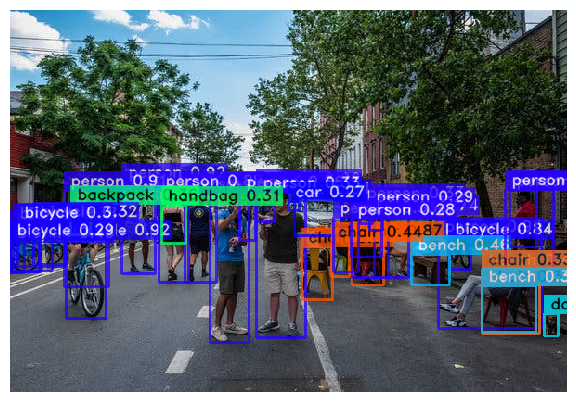

In [ ]:
# Detection yapmak istediğiniz resmin url'ni aşağıya ekleyebilirsiniz.
url = "https://static01.nyt.com/images/2020/06/22/opinion/20gillisWeb/merlin_173526783_192e498a-5699-411c-b1e5-64fa738eec17-articleLarge.jpg?quality=75&auto=webp&disable=upscale"
yolo_nas_l.predict(url, conf=0.25).show()

#### Video

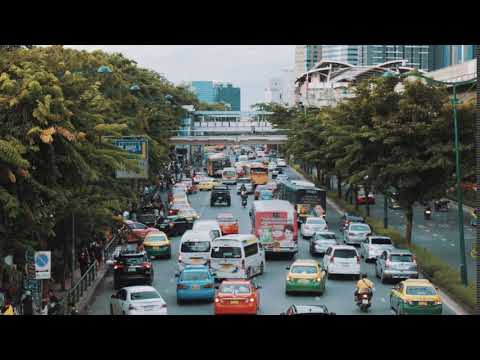

In [ ]:
from IPython.display import YouTubeVideo


video_id = 'CftLBPI1Ga4'  #İstediğiniz videonun id si ile değiştirebilirsiniz.
video = YouTubeVideo(video_id)

display(video)

In [ ]:
%%capture

video_url = f'https://www.youtube.com/watch?v={video_id}'

!pip install -U "git+https://github.com/ytdl-org/youtube-dl.git"
!python -m youtube_dl -f 'bestvideo[ext=mp4]+bestaudio[ext=m4a]/mp4' "$video_url"

print('Video downloaded successfully')

input_video_path = "Cars, Busy Streets, City Traffic - No Copyright Royalty Free Stock Videos-CftLBPI1Ga4.mp4"
output_video_path = "detections.mp4"

In [ ]:
yolo_nas_l.predict("cam2.mp4").save(output_video_path)

Predicting Video: 100%|██████████| 126/126 [00:05<00:00, 21.18it/s]


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/detections.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

### Kaynak önerileri:


*   Custom dataset: https://www.youtube.com/watch?v=PBh9MFH2lB4
*   İşaret Dili: https://www.youtube.com/watch?v=1FOawpuQflg

